<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc">
<ul class="toc-item">
<li>
<span>
<a href="#section1" data-toc-modified-id="section1">
<span class="toc-item-num">1.&nbsp;&nbsp;</span>Executive Summary</a>
</span>
</li>    
<li>
<span>
<a href="#section2" data-toc-modified-id="section2">
<span class="toc-item-num">2.&nbsp;&nbsp;</span>Data Exploration</a>
</span>
<ul class="toc-item">
<li>
<span>
<a href="#section2_1" data-toc-modified-id="section2_1">
<span class="toc-item-num">2.1.&nbsp;&nbsp;</span>Credit Limit</a>
</span>
</li>
<li>
<span>
<a href="#section2_2" data-toc-modified-id="section2_2">
<span class="toc-item-num">2.2.&nbsp;&nbsp;</span>Age</a>
</span>
</li>
<li>
<span>
<a href="#section2_3" data-toc-modified-id="section2_3">
<span class="toc-item-num">2.3.&nbsp;&nbsp;</span>Billing Amounts</a>
</span>
</li>
<li>
<span>
<a href="#section2_4" data-toc-modified-id="section2_4">
<span class="toc-item-num">2.4.&nbsp;&nbsp;</span>Payment Amounts</a>
</span>
</li>
<li>
<span>
<a href="#section2_5" data-toc-modified-id="section2_5">
<span class="toc-item-num">2.5.&nbsp;&nbsp;</span>Gender</a>
</span>
</li>
<li>
<span>
<a href="#section2_6" data-toc-modified-id="section2_6">
<span class="toc-item-num">2.6.&nbsp;&nbsp;</span>Education</a>
</span>
</li>
<li>
<span>
<a href="#section2_7" data-toc-modified-id="section2_7">
<span class="toc-item-num">2.7.&nbsp;&nbsp;</span>Relationship Status</a>
</span>
</li>
<li>
<span>
<a href="#section2_8" data-toc-modified-id="section2_8">
<span class="toc-item-num">2.8.&nbsp;&nbsp;</span>Billing Periods</a>
</span>
</li>    
</ul>    
</li>
<li>
<span>
<a href="#section3" data-toc-modified-id="section3">
<span class="toc-item-num">3.&nbsp;&nbsp;</span>Feature Selection</a>
</span>
</li>
<li>
<span>
<a href="#section4" data-toc-modified-id="section4">
<span class="toc-item-num">4.&nbsp;&nbsp;</span>Hyperparameter Optimization</a>
</span>
</li>
<li>
<span>
<a href="#section5" data-toc-modified-id="section5">
<span class="toc-item-num">5.&nbsp;&nbsp;</span>Pipelines</a>
</span>
</li>
<li>
<span>
<a href="#section6" data-toc-modified-id="section6">
<span class="toc-item-num">6.&nbsp;&nbsp;</span>Algorithm Comparisons</a>
</span>
</li>
<li>
<span>
<a href="#section7" data-toc-modified-id="section7">
<span class="toc-item-num">7.&nbsp;&nbsp;</span>Conclusions</a>
</span>
</li>    
</ul> 
</div>

<a id='section1'></a>

# Executive Summary

The following presentation will attempt to predict the likelihood of credit card default.

## Credit Limit

Credit limits appear to be lower for cardholders that are more inclined to default. This makes intuitive sense since cardholders with higher credit limits will have higher; income, assets, and credit scores. 

## Age

Age does not seem to factor into likelihood of default.

## Billing Amounts

There does appear to be a difference in the slopes of billing amounts in cardholders inclined to default relative to cardholders that are not inclined to default. It would appear that cardholders inclined to default do attempt to act responsibly by limiting their purchases.

Billing amounts also appear to be more consistent in cardholders that are more inclined to default. This may be due to cardholders not inclined to default being more able to pay down balances.

Billing amounts in cardholders that are more inclined to default appear to be higher as a percentage relative to their credit limits. 

## Payment Amounts

As cardholders not inclined to default have greater slopes to their billing amounts, they also have greater slopes to their payments. This would imply that the nature of purchases and payments are different between cardholders inclined to default versus cardholders that are not. Cardholders inclined to default are curtailing their purchases, but are also making minimal payments, as opposed to cardholders that are not inclined to default drawing down their monthly balances.

Cardholders not inclined to default tend to make purchases as a higher percentage relative to their credit limits.

Payment status is defined as follows;

-2 - Bill amount for the billing period less than or equal to zero. Payment amount for the billing period less than or equal to zero. Amount outstanding for the billing period after payment less than or equal to zero.

-1 - Bill amount for the billing period greater than zero. Payment amount for the billing period greater than zero. Amount outstanding for the billing period after payment less than or equal to zero.

0 - Bill amount for the billing period greater than zero. Payment amount for the billing period greater than zero. Amount outstanding for the billing period after payment greater than zero.

Values greater than zero represent new purchase activity with no payment made.

This would imply that the average of the sum of payment statuses across billing periods would be better for lower values and worse for higher values. This can be seen when comparing cardholders more inclined to default relative to cardholders that are less inclined to default.

## Gender

Males seem to be somewhat more inclined to default than females.

## Education

Education seems to play a role in terms of the likelihood of default. The likelihood of default decreases as education level increases. This does make intuitive sense, since more highly educated individuals tend to have higher incomes. With this in mind, the 'Other' category is probably largely comprised of individuals at the doctoral level.

## Relationship Status

Being married does seem to increase the likelihood of default. Probably due to personal sacrifices being easier to make than familial sacrifices. The 'Other' category closely matches the 'Married' category and is probably comprised largely of common law relationships that would be subject to similar conditions.

## Billing Period Comparison

There appears to be a fairly sharp upward tend across billing periods. With payment statuses also somewhat degrading. However, the time frame isn't large enough to indentify this as a long-term trend.

## Feature Selection

Final features were selected by individually removing features and examining the resulting prediction accuracy. Features that had no effect on accuracy, meaning the removal did not result in a lower accuracy, were removed.

## Model Recommendation

Predictability of credit card default appears to be quite high at around 82% across algorithms. The Gradient Boosting Classifier performed the best when factoring in ROC/AUC.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

from sklearn.compose import make_column_transformer
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, normalize, StandardScaler
from sklearn.svm import SVC

np.random.seed(123)

%matplotlib inline

warnings.filterwarnings('ignore')
sns.set()

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
class Card_Default():
    
    file_data = ''
    file_data_default = ''
    file_data_non_default = ''
    file_name = ''
    
    after_payment1 = 0
    after_payment2 = 0
    after_payment3 = 0
    after_payment4 = 0
    after_payment5 = 0
    age = 0
    bill_amt1 = 0
    bill_amt2 = 0
    bill_amt3 = 0
    bill_amt4 = 0
    bill_amt5 = 0
    bill_amt6 = 0
    bill_amt1_limit = 0
    bill_amt2_limit = 0
    bill_amt3_limit = 0
    bill_amt4_limit = 0
    bill_amt5_limit = 0
    bill_amt6_limit = 0
    bill_amt_score = 0
    bill_amt_slope = 0
    card_default = 0
    education = 0
    limit_bal = 0
    marriage = 0
    new_purchase1 = 0
    new_purchase2 = 0
    new_purchase3 = 0
    new_purchase4 = 0
    new_purchase5 = 0
    new_purchase1_limit = 0
    new_purchase2_limit = 0
    new_purchase3_limit = 0
    new_purchase4_limit = 0
    new_purchase5_limit = 0
    pay_0 = 0 
    pay_2 = 0
    pay_3 = 0
    pay_4 = 0
    pay_5 = 0
    pay_6 = 0    
    pay_amt1 = 0
    pay_amt2 = 0
    pay_amt3 = 0
    pay_amt4 = 0
    pay_amt5 = 0
    pay_amt6 = 0
    pay_amt_score = 0
    pay_amt_slope = 0
    pay_sum = 0
    sex = 0
    
    payment_history_df = pd.DataFrame()
    sep_payment_history_df = pd.DataFrame()
    aug_payment_history_df = pd.DataFrame()
    jul_payment_history_df = pd.DataFrame()
    jun_payment_history_df = pd.DataFrame()
    may_payment_history_df = pd.DataFrame()
    apr_payment_history_df = pd.DataFrame()
    billing_periods_df = pd.DataFrame()
    education_summary_df = pd.DataFrame()
    gender_summary_df = pd.DataFrame()
    relationship_summary_df = pd.DataFrame()
    prediction_df = pd.DataFrame()
    
    def load_file(self):
        
        self.file_data = pd.read_csv(self.file_name, index_col='ID')
        
        self.preprocess_data()
        
        self.file_data_default = self.file_data[self.file_data['CARD_DEFAULT'] == 1]
        self.file_data_non_default = self.file_data[self.file_data['CARD_DEFAULT'] == 0]
        
        self.limit_bal = self.file_data['LIMIT_BAL']
        self.sex = self.file_data['SEX']
        self.education = self.file_data['EDUCATION']
        self.marriage = self.file_data['MARRIAGE']
        self.age = self.file_data['AGE']
        self.pay_0 = self.file_data['PAY_0']
        self.pay_2 = self.file_data['PAY_2']
        self.pay_3 = self.file_data['PAY_3']
        self.pay_4 = self.file_data['PAY_4']
        self.pay_5 = self.file_data['PAY_5']
        self.pay_6 = self.file_data['PAY_6']
        self.bill_amt1 = self.file_data['BILL_AMT1']
        self.bill_amt2 = self.file_data['BILL_AMT2']
        self.bill_amt3 = self.file_data['BILL_AMT3']
        self.bill_amt4 = self.file_data['BILL_AMT4']
        self.bill_amt5 = self.file_data['BILL_AMT5']
        self.bill_amt6 = self.file_data['BILL_AMT6']
        self.bill_amt_score = self.file_data['BILL_AMT_SCORE']
        self.bill_amt_slope = self.file_data['BILL_AMT_SLOPE']
        self.pay_amt1 = self.file_data['PAY_AMT1']
        self.pay_amt2 = self.file_data['PAY_AMT2']
        self.pay_amt3 = self.file_data['PAY_AMT3']
        self.pay_amt4 = self.file_data['PAY_AMT4']
        self.pay_amt5 = self.file_data['PAY_AMT5']
        self.pay_amt6 = self.file_data['PAY_AMT6']
        self.pay_amt_score = self.file_data['PAY_AMT_SCORE']
        self.pay_amt_slope = self.file_data['PAY_AMT_SLOPE']
        self.card_default = self.file_data['CARD_DEFAULT']
        
        self.pay_sum = (self.pay_2 + self.pay_3 + self.pay_4 + self.pay_5 + self.pay_6) /5
        self.bill_amt1_limit = self.bill_amt1 / self.limit_bal
        self.bill_amt2_limit = self.bill_amt2 / self.limit_bal
        self.bill_amt3_limit = self.bill_amt3 / self.limit_bal
        self.bill_amt4_limit = self.bill_amt4 / self.limit_bal
        self.bill_amt5_limit = self.bill_amt5 / self.limit_bal
        self.bill_amt6_limit = self.bill_amt6 / self.limit_bal
        self.after_payment1 = self.bill_amt2 - self.pay_amt1
        self.after_payment2 = self.bill_amt3 - self.pay_amt2
        self.after_payment3 = self.bill_amt4 - self.pay_amt3
        self.after_payment4 = self.bill_amt5 - self.pay_amt4
        self.after_payment5 = self.bill_amt6 - self.pay_amt5
        self.new_purchase1 = self.bill_amt1 - self.after_payment1
        self.new_purchase2 = self.bill_amt2 - self.after_payment2
        self.new_purchase3 = self.bill_amt3 - self.after_payment3
        self.new_purchase4 = self.bill_amt4 - self.after_payment4
        self.new_purchase5 = self.bill_amt5 - self.after_payment5
        self.new_purchase1_limit = self.new_purchase1 / self.limit_bal
        self.new_purchase2_limit = self.new_purchase2 / self.limit_bal
        self.new_purchase3_limit = self.new_purchase3 / self.limit_bal
        self.new_purchase4_limit = self.new_purchase4 / self.limit_bal
        self.new_purchase5_limit = self.new_purchase5 / self.limit_bal
        
        self.payment_history_df['SEP_NEW_PURCHASE'] = self.new_purchase1
        self.payment_history_df['SEP_PAY_STATUS'] = self.pay_2
        self.payment_history_df['SEP_AFTER_PAYMENT'] = self.after_payment1
        self.payment_history_df['SEP_PAY_AMOUNT'] = self.pay_amt1        
        self.payment_history_df['SEP_BILL_AMT'] = self.bill_amt2
        
        self.sep_payment_history_df['NEW_PURCHASE'] = self.new_purchase1
        self.sep_payment_history_df['PAY_STATUS'] = self.pay_2
        self.sep_payment_history_df['AFTER_PAYMENT'] = self.after_payment1
        self.sep_payment_history_df['PAY_AMOUNT'] = self.pay_amt1        
        self.sep_payment_history_df['BILL_AMT'] = self.bill_amt2
        
        self.payment_history_df['AUG_NEW_PURCHASE'] = self.new_purchase2
        self.payment_history_df['AUG_PAY_STATUS'] = self.pay_3
        self.payment_history_df['AUG_AFTER_PAYMENT'] = self.after_payment2
        self.payment_history_df['AUG_PAY_AMOUNT'] = self.pay_amt2        
        self.payment_history_df['AUG_BILL_AMT'] = self.bill_amt3
        
        self.aug_payment_history_df['NEW_PURCHASE'] = self.new_purchase2
        self.aug_payment_history_df['PAY_STATUS'] = self.pay_3
        self.aug_payment_history_df['AFTER_PAYMENT'] = self.after_payment2
        self.aug_payment_history_df['PAY_AMOUNT'] = self.pay_amt2        
        self.aug_payment_history_df['BILL_AMT'] = self.bill_amt3
        
        self.payment_history_df['JUL_NEW_PURCHASE'] = self.new_purchase3
        self.payment_history_df['JUL_PAY_STATUS'] = self.pay_4
        self.payment_history_df['JUL_AFTER_PAYMENT'] = self.after_payment3
        self.payment_history_df['JUL_PAY_AMOUNT'] = self.pay_amt3        
        self.payment_history_df['JUL_BILL_AMT'] = self.bill_amt4
        
        self.jul_payment_history_df['NEW_PURCHASE'] = self.new_purchase3
        self.jul_payment_history_df['PAY_STATUS'] = self.pay_4
        self.jul_payment_history_df['AFTER_PAYMENT'] = self.after_payment3
        self.jul_payment_history_df['PAY_AMOUNT'] = self.pay_amt3        
        self.jul_payment_history_df['BILL_AMT'] = self.bill_amt4
        
        self.payment_history_df['JUN_NEW_PURCHASE'] = self.new_purchase4
        self.payment_history_df['JUN_PAY_STATUS'] = self.pay_5
        self.payment_history_df['JUN_AFTER_PAYMENT'] = self.after_payment4
        self.payment_history_df['JUN_PAY_AMOUNT'] = self.pay_amt4
        self.payment_history_df['JUN_BILL_AMT'] = self.bill_amt5
        
        self.jun_payment_history_df['NEW_PURCHASE'] = self.new_purchase4
        self.jun_payment_history_df['PAY_STATUS'] = self.pay_5
        self.jun_payment_history_df['AFTER_PAYMENT'] = self.after_payment4
        self.jun_payment_history_df['PAY_AMOUNT'] = self.pay_amt4        
        self.jun_payment_history_df['BILL_AMT'] = self.bill_amt5
        
        self.payment_history_df['MAY_NEW_PURCHASE'] = self.new_purchase5
        self.payment_history_df['MAY_PAY_STATUS'] = self.pay_6
        self.payment_history_df['MAY_AFTER_PAYMENT'] = self.after_payment5
        self.payment_history_df['MAY_PAY_AMOUNT'] = self.pay_amt5        
        self.payment_history_df['MAY_BILL_AMT'] = self.bill_amt6
        
        self.may_payment_history_df['NEW_PURCHASE'] = self.new_purchase5
        self.may_payment_history_df['PAY_STATUS'] = self.pay_6
        self.may_payment_history_df['AFTER_PAYMENT'] = self.after_payment5
        self.may_payment_history_df['PAY_AMOUNT'] = self.pay_amt5        
        self.may_payment_history_df['BILL_AMT'] = self.bill_amt6
        
        self.billing_periods()
        self.education_summary()
        self.gender_summary()
        self.relationship_summary()
        self.prediction_data()
    
    def preprocess_data(self):
        
        model = LinearRegression()
        
        for index, card_data in self.file_data.iterrows():
    
            if card_data['EDUCATION'] > 4:
                self.file_data.loc[index, 'EDUCATION'] = 4

            if card_data['MARRIAGE'] == 0:
                self.file_data.loc[index, 'MARRIAGE'] = 3
            
            if card_data['PAY_2'] == -2:
                
                after_payment = card_data['BILL_AMT2'] - card_data['PAY_AMT1']
                pay_amount = card_data['PAY_AMT1']        
                bill_amount = card_data['BILL_AMT2']
                
                if not (bill_amount <= 0 and pay_amount <= 0 and after_payment <= 0):
                    
                    if (bill_amount > 0 and pay_amount > 0 and after_payment <= 0): card_data['PAY_2'] = -1
                    elif (bill_amount > 0 and pay_amount > 0 and after_payment > 0): card_data['PAY_2'] = 0
                        
            if card_data['PAY_2'] == -1:
                
                after_payment = card_data['BILL_AMT2'] - card_data['PAY_AMT1']
                pay_amount = card_data['PAY_AMT1']        
                bill_amount = card_data['BILL_AMT2']
                
                if not (bill_amount > 0 and pay_amount > 0 and after_payment <= 0):
                    
                    if (bill_amount <= 0 and pay_amount <= 0 and after_payment <= 0): card_data['PAY_2'] = -2
                    elif (bill_amount > 0 and pay_amount > 0 and after_payment > 0): card_data['PAY_2'] = 0            
                        
            if card_data['PAY_2'] == 0:
                
                after_payment = card_data['BILL_AMT2'] - card_data['PAY_AMT1']
                pay_amount = card_data['PAY_AMT1']        
                bill_amount = card_data['BILL_AMT2']
                
                if not (bill_amount > 0 and pay_amount > 0 and after_payment > 0):
                    
                    if (bill_amount <= 0 and pay_amount <= 0 and after_payment <= 0): card_data['PAY_2'] = -2
                    elif (bill_amount > 0 and pay_amount > 0 and after_payment <= 0): card_data['PAY_2'] = -1
                        
            if card_data['PAY_2'] >= 1:
                
                after_payment = card_data['BILL_AMT2'] - card_data['PAY_AMT1']
                pay_amount = card_data['PAY_AMT1']        
                bill_amount = card_data['BILL_AMT2']
                                
                if (bill_amount <= 0 and after_payment <= 0): card_data['PAY_2'] = -2
                elif (bill_amount > 0 and pay_amount > 0 and after_payment <= 0): card_data['PAY_2'] = -1
                elif (bill_amount > 0 and pay_amount > 0 and after_payment > 0): card_data['PAY_2'] = 0
                elif (card_data['PAY_AMT1'] <= 0 and 
                      card_data['PAY_AMT2'] <= 0 and 
                      card_data['PAY_AMT3'] <= 0 and
                      card_data['PAY_AMT4'] <= 0 and
                      card_data['PAY_AMT5'] <= 0) : card_data['PAY_2'] = 5
                elif (card_data['PAY_AMT1'] <= 0 and 
                      card_data['PAY_AMT2'] <= 0 and 
                      card_data['PAY_AMT3'] <= 0 and
                      card_data['PAY_AMT4'] <= 0) : card_data['PAY_2'] = 4
                elif (card_data['PAY_AMT1'] <= 0 and 
                      card_data['PAY_AMT2'] <= 0 and 
                      card_data['PAY_AMT3'] <= 0) : card_data['PAY_2'] = 3
                elif (card_data['PAY_AMT1'] <= 0 and 
                      card_data['PAY_AMT2'] <= 0) : card_data['PAY_2'] = 2
                elif (card_data['PAY_AMT1'] <= 0) : card_data['PAY_2'] = 1
                        
            if card_data['PAY_3'] == -2:
                
                after_payment = card_data['BILL_AMT3'] - card_data['PAY_AMT2']
                pay_amount = card_data['PAY_AMT2']        
                bill_amount = card_data['BILL_AMT3']
                
                if not (bill_amount <= 0 and pay_amount <= 0 and after_payment <= 0):
                    
                    if (bill_amount > 0 and pay_amount > 0 and after_payment <= 0): card_data['PAY_3'] = -1
                    elif (bill_amount > 0 and pay_amount > 0 and after_payment > 0): card_data['PAY_3'] = 0
                        
            if card_data['PAY_3'] == -1:
                
                after_payment = card_data['BILL_AMT3'] - card_data['PAY_AMT2']
                pay_amount = card_data['PAY_AMT2']        
                bill_amount = card_data['BILL_AMT3']
                
                if not (bill_amount > 0 and pay_amount > 0 and after_payment <= 0):
                    
                    if (bill_amount <= 0 and pay_amount <= 0 and after_payment <= 0): card_data['PAY_3'] = -2
                    elif (bill_amount > 0 and pay_amount > 0 and after_payment > 0): card_data['PAY_3'] = 0            
                        
            if card_data['PAY_3'] == 0:
                
                after_payment = card_data['BILL_AMT3'] - card_data['PAY_AMT2']
                pay_amount = card_data['PAY_AMT2']        
                bill_amount = card_data['BILL_AMT3']
                
                if not (bill_amount > 0 and pay_amount > 0 and after_payment > 0):
                    
                    if (bill_amount <= 0 and pay_amount <= 0 and after_payment <= 0): card_data['PAY_3'] = -2
                    elif (bill_amount > 0 and pay_amount > 0 and after_payment <= 0): card_data['PAY_3'] = -1
            
            if card_data['PAY_3'] >= 1:
                
                after_payment = card_data['BILL_AMT3'] - card_data['PAY_AMT2']
                pay_amount = card_data['PAY_AMT2']        
                bill_amount = card_data['BILL_AMT3']
                                
                if (bill_amount <= 0 and after_payment <= 0): card_data['PAY_3'] = -2
                elif (bill_amount > 0 and pay_amount > 0 and after_payment <= 0): card_data['PAY_3'] = -1
                elif (bill_amount > 0 and pay_amount > 0 and after_payment > 0): card_data['PAY_3'] = 0
                elif (card_data['PAY_AMT2'] <= 0 and 
                      card_data['PAY_AMT3'] <= 0 and
                      card_data['PAY_AMT4'] <= 0 and
                      card_data['PAY_AMT5'] <= 0) : card_data['PAY_3'] = 4
                elif (card_data['PAY_AMT2'] <= 0 and 
                      card_data['PAY_AMT3'] <= 0 and
                      card_data['PAY_AMT4'] <= 0) : card_data['PAY_3'] = 3
                elif (card_data['PAY_AMT2'] <= 0 and 
                      card_data['PAY_AMT3'] <= 0) : card_data['PAY_3'] = 2
                elif (card_data['PAY_AMT2'] <= 0) : card_data['PAY_3'] = 1
            
            if card_data['PAY_4'] == -2:
                
                after_payment = card_data['BILL_AMT4'] - card_data['PAY_AMT3']
                pay_amount = card_data['PAY_AMT3']        
                bill_amount = card_data['BILL_AMT4']
                
                if not (bill_amount <= 0 and pay_amount <= 0 and after_payment <= 0):
                    
                    if (bill_amount > 0 and pay_amount > 0 and after_payment <= 0): card_data['PAY_4'] = -1
                    elif (bill_amount > 0 and pay_amount > 0 and after_payment > 0): card_data['PAY_4'] = 0
                        
            if card_data['PAY_4'] == -1:
                
                after_payment = card_data['BILL_AMT4'] - card_data['PAY_AMT3']
                pay_amount = card_data['PAY_AMT3']        
                bill_amount = card_data['BILL_AMT4']
                
                if not (bill_amount > 0 and pay_amount > 0 and after_payment <= 0):
                    
                    if (bill_amount <= 0 and pay_amount <= 0 and after_payment <= 0): card_data['PAY_4'] = -2
                    elif (bill_amount > 0 and pay_amount > 0 and after_payment > 0): card_data['PAY_4'] = 0            
                        
            if card_data['PAY_4'] == 0:
                
                after_payment = card_data['BILL_AMT4'] - card_data['PAY_AMT3']
                pay_amount = card_data['PAY_AMT3']        
                bill_amount = card_data['BILL_AMT4']
                
                if not (bill_amount > 0 and pay_amount > 0 and after_payment > 0):
                    
                    if (bill_amount <= 0 and pay_amount <= 0 and after_payment <= 0): card_data['PAY_4'] = -2
                    elif (bill_amount > 0 and pay_amount > 0 and after_payment <= 0): card_data['PAY_5'] = -1            
            
            if card_data['PAY_4'] >= 1:
                
                after_payment = card_data['BILL_AMT4'] - card_data['PAY_AMT3']
                pay_amount = card_data['PAY_AMT3']        
                bill_amount = card_data['BILL_AMT4']
                                
                if (bill_amount <= 0 and after_payment <= 0): card_data['PAY_4'] = -2
                elif (bill_amount > 0 and pay_amount > 0 and after_payment <= 0): card_data['PAY_4'] = -1
                elif (bill_amount > 0 and pay_amount > 0 and after_payment > 0): card_data['PAY_4'] = 0
                elif (card_data['PAY_AMT3'] <= 0 and
                      card_data['PAY_AMT4'] <= 0 and
                      card_data['PAY_AMT5'] <= 0) : card_data['PAY_4'] = 3
                elif (card_data['PAY_AMT3'] <= 0 and
                      card_data['PAY_AMT4'] <= 0) : card_data['PAY_4'] = 2
                elif (card_data['PAY_AMT3'] <= 0) : card_data['PAY_4'] = 1    
            
            if card_data['PAY_5'] == -2:
                
                after_payment = card_data['BILL_AMT5'] - card_data['PAY_AMT4']
                pay_amount = card_data['PAY_AMT4']        
                bill_amount = card_data['BILL_AMT5']
                
                if not (bill_amount <= 0 and pay_amount <= 0 and after_payment <= 0):
                    
                    if (bill_amount > 0 and pay_amount > 0 and after_payment <= 0): card_data['PAY_5'] = -1
                    elif (bill_amount > 0 and pay_amount > 0 and after_payment > 0): card_data['PAY_5'] = 0
                        
            if card_data['PAY_5'] == -1:
                
                after_payment = card_data['BILL_AMT5'] - card_data['PAY_AMT4']
                pay_amount = card_data['PAY_AMT4']        
                bill_amount = card_data['BILL_AMT5']
                
                if not (bill_amount > 0 and pay_amount > 0 and after_payment <= 0):
                    
                    if (bill_amount <= 0 and pay_amount <= 0 and after_payment <= 0): card_data['PAY_5'] = -2
                    elif (bill_amount > 0 and pay_amount > 0 and after_payment > 0): card_data['PAY_5'] = 0            
                        
            if card_data['PAY_5'] == 0:
                
                after_payment = card_data['BILL_AMT5'] - card_data['PAY_AMT4']
                pay_amount = card_data['PAY_AMT4']        
                bill_amount = card_data['BILL_AMT5']
                
                if not (bill_amount > 0 and pay_amount > 0 and after_payment > 0):
                    
                    if (bill_amount <= 0 and pay_amount <= 0 and after_payment <= 0): card_data['PAY_5'] = -2
                    elif (bill_amount > 0 and pay_amount > 0 and after_payment <= 0): card_data['PAY_5'] = -1            
            
            if card_data['PAY_5'] >= 1:
                
                after_payment = card_data['BILL_AMT5'] - card_data['PAY_AMT4']
                pay_amount = card_data['PAY_AMT4']        
                bill_amount = card_data['BILL_AMT5']
                                
                if (bill_amount <= 0 and after_payment <= 0): card_data['PAY_5'] = -2
                elif (bill_amount > 0 and pay_amount > 0 and after_payment <= 0): card_data['PAY_5'] = -1
                elif (bill_amount > 0 and pay_amount > 0 and after_payment > 0): card_data['PAY_5'] = 0
                elif (card_data['PAY_AMT4'] <= 0 and
                      card_data['PAY_AMT5'] <= 0) : card_data['PAY_5'] = 2
                elif (card_data['PAY_AMT4'] <= 0) : card_data['PAY_5'] = 1    
            
            if card_data['PAY_6'] == -2:
                
                after_payment = card_data['BILL_AMT6'] - card_data['PAY_AMT5']
                pay_amount = card_data['PAY_AMT5']        
                bill_amount = card_data['BILL_AMT6']
                
                if not (bill_amount <= 0 and pay_amount <= 0 and after_payment <= 0):
                    
                    if (bill_amount > 0 and pay_amount > 0 and after_payment <= 0): card_data['PAY_6'] = -1
                    elif (bill_amount > 0 and pay_amount > 0 and after_payment > 0): card_data['PAY_6'] = 0
                        
            if card_data['PAY_6'] == -1:
                
                after_payment = card_data['BILL_AMT6'] - card_data['PAY_AMT5']
                pay_amount = card_data['PAY_AMT5']        
                bill_amount = card_data['BILL_AMT6']
                
                if not (bill_amount > 0 and pay_amount > 0 and after_payment <= 0):
                    
                    if (bill_amount <= 0 and pay_amount <= 0 and after_payment <= 0): card_data['PAY_6'] = -2
                    elif (bill_amount > 0 and pay_amount > 0 and after_payment > 0): card_data['PAY_6'] = 0            
                        
            if card_data['PAY_6'] == 0:
                
                after_payment = card_data['BILL_AMT6'] - card_data['PAY_AMT5']
                pay_amount = card_data['PAY_AMT5']        
                bill_amount = card_data['BILL_AMT6']
                
                if not (bill_amount > 0 and pay_amount > 0 and after_payment > 0):
                    
                    if (bill_amount <= 0 and pay_amount <= 0 and after_payment <= 0): card_data['PAY_6'] = -2
                    elif (bill_amount > 0 and pay_amount > 0 and after_payment <= 0): card_data['PAY_6'] = -1
            
            if card_data['PAY_6'] >= 1:
                
                after_payment = card_data['BILL_AMT6'] - card_data['PAY_AMT5']
                pay_amount = card_data['PAY_AMT5']        
                bill_amount = card_data['BILL_AMT6']
                                
                if (bill_amount <= 0 and after_payment <= 0): card_data['PAY_6'] = -2
                elif (bill_amount > 0 and pay_amount > 0 and after_payment <= 0): card_data['PAY_6'] = -1
                elif (bill_amount > 0 and pay_amount > 0 and after_payment > 0): card_data['PAY_6'] = 0
                elif (card_data['PAY_AMT5'] <= 0) : card_data['PAY_6'] = 1
            
            months = np.array([1,2,3,4,5,6]).reshape(-1, 1)

            bill_amounts = []
            bill_amounts.append(card_data['BILL_AMT6'])
            bill_amounts.append(card_data['BILL_AMT5'])
            bill_amounts.append(card_data['BILL_AMT4'])
            bill_amounts.append(card_data['BILL_AMT3'])
            bill_amounts.append(card_data['BILL_AMT2'])
            bill_amounts.append(card_data['BILL_AMT1'])
            bill_amounts = np.array(bill_amounts)

            model.fit(months, bill_amounts)
            self.file_data.loc[index, 'BILL_AMT_SLOPE'] = model.coef_
            self.file_data.loc[index, 'BILL_AMT_SCORE'] = model.score(months, bill_amounts)
            
            pay_amounts = []
            pay_amounts.append(card_data['PAY_AMT6'])
            pay_amounts.append(card_data['PAY_AMT5'])
            pay_amounts.append(card_data['PAY_AMT4'])
            pay_amounts.append(card_data['PAY_AMT3'])
            pay_amounts.append(card_data['PAY_AMT2'])
            pay_amounts.append(card_data['PAY_AMT1'])
            pay_amounts = np.array(pay_amounts)

            model.fit(months, pay_amounts)
            self.file_data.loc[index, 'PAY_AMT_SLOPE'] = model.coef_
            self.file_data.loc[index, 'PAY_AMT_SCORE'] = model.score(months, pay_amounts)
    
    def average_age(self):
        
        average_age = []
        average_age.append(['All', self.file_data['AGE'].mean()])
        average_age.append(['Default', self.file_data_default['AGE'].mean()])
        average_age.append(['Non-Default', self.file_data_non_default['AGE'].mean()])

        sns.barplot(data = pd.DataFrame(average_age, 
                                        columns = ['Default Status', 'Average Age']), 
                    x = 'Average Age', 
                    y = 'Default Status')    
    
    def average_credit_limit(self):
        
        average_credit_limit = []
        average_credit_limit.append(['All', self.file_data['LIMIT_BAL'].mean()])
        average_credit_limit.append(['Default', self.file_data_default['LIMIT_BAL'].mean()])
        average_credit_limit.append(['Non-Default', self.file_data_non_default['LIMIT_BAL'].mean()])

        sns.barplot(data = pd.DataFrame(average_credit_limit, 
                                        columns = ['Default Status', 'Average Credit Limit']), 
                    x = 'Average Credit Limit', 
                    y = 'Default Status')
    
    def average_payment(self):
        
        payment_sum_df = pd.DataFrame()
        payment_sum_df['PAYMENT_SUM'] = self.pay_sum.to_numpy()
        payment_sum_df['CARD_DEFAULT'] = self.card_default.to_numpy()

        payment_sum_default_df = payment_sum_df[payment_sum_df['CARD_DEFAULT'] == 1]
        payment_sum_non_default_df = payment_sum_df[payment_sum_df['CARD_DEFAULT'] == 0]

        average_payment_sum = []
        average_payment_sum.append(['All', payment_sum_df['PAYMENT_SUM'].mean()])
        average_payment_sum.append(['Default', payment_sum_default_df['PAYMENT_SUM'].mean()])
        average_payment_sum.append(['Non-Default', payment_sum_non_default_df['PAYMENT_SUM'].mean()])

        sns.barplot(data = pd.DataFrame(average_payment_sum, 
                                columns = ['Default Status', 'Average Payment Sum']), 
            x = 'Average Payment Sum', 
            y = 'Default Status')
    
    def billing_periods(self):
        
        billing_periods = []
        billing_period = []
        billing_period.append('SEP')
        billing_period.append(self.sep_payment_history_df['BILL_AMT'].mean())
        billing_period.append(self.sep_payment_history_df['PAY_AMOUNT'].mean()) 
        billing_period.append(self.sep_payment_history_df['AFTER_PAYMENT'].mean())
        billing_period.append(self.sep_payment_history_df['PAY_STATUS'].mean())
        billing_period.append(self.sep_payment_history_df['NEW_PURCHASE'].mean())
        billing_periods.append(billing_period)
        billing_period = []
        billing_period.append('AUG')
        billing_period.append(self.aug_payment_history_df['BILL_AMT'].mean())
        billing_period.append(self.aug_payment_history_df['PAY_AMOUNT'].mean()) 
        billing_period.append(self.aug_payment_history_df['AFTER_PAYMENT'].mean())
        billing_period.append(self.aug_payment_history_df['PAY_STATUS'].mean())
        billing_period.append(self.aug_payment_history_df['NEW_PURCHASE'].mean())
        billing_periods.append(billing_period)
        billing_period = []
        billing_period.append('JUL')
        billing_period.append(self.jul_payment_history_df['BILL_AMT'].mean())
        billing_period.append(self.jul_payment_history_df['PAY_AMOUNT'].mean()) 
        billing_period.append(self.jul_payment_history_df['AFTER_PAYMENT'].mean())
        billing_period.append(self.jul_payment_history_df['PAY_STATUS'].mean())
        billing_period.append(self.jul_payment_history_df['NEW_PURCHASE'].mean())
        billing_periods.append(billing_period)
        billing_period = []
        billing_period.append('JUN')
        billing_period.append(self.jun_payment_history_df['BILL_AMT'].mean())
        billing_period.append(self.jun_payment_history_df['PAY_AMOUNT'].mean()) 
        billing_period.append(self.jun_payment_history_df['AFTER_PAYMENT'].mean())
        billing_period.append(self.jun_payment_history_df['PAY_STATUS'].mean())
        billing_period.append(self.jun_payment_history_df['NEW_PURCHASE'].mean())
        billing_periods.append(billing_period)
        billing_period = []
        billing_period.append('MAY')
        billing_period.append(self.may_payment_history_df['BILL_AMT'].mean())
        billing_period.append(self.may_payment_history_df['PAY_AMOUNT'].mean()) 
        billing_period.append(self.may_payment_history_df['AFTER_PAYMENT'].mean())
        billing_period.append(self.may_payment_history_df['PAY_STATUS'].mean())
        billing_period.append(self.may_payment_history_df['NEW_PURCHASE'].mean())
        billing_periods.append(billing_period)

        self.billing_periods_df = pd.DataFrame(billing_periods, 
                     columns = ['Month','Bill Amount','Payment Amount', 'After Payment Balance', 'Payment Status', 'New Purchases'])
    
    def billing_amount_limit(self):
        
        bill_amt_limit_df = pd.DataFrame()
        bill_amt_limit_df['BILL_AMT1_LIMIT'] = card_default.bill_amt1_limit.to_numpy()
        bill_amt_limit_df['BILL_AMT2_LIMIT'] = card_default.bill_amt2_limit.to_numpy()
        bill_amt_limit_df['BILL_AMT3_LIMIT'] = card_default.bill_amt3_limit.to_numpy()
        bill_amt_limit_df['BILL_AMT4_LIMIT'] = card_default.bill_amt4_limit.to_numpy()
        bill_amt_limit_df['BILL_AMT5_LIMIT'] = card_default.bill_amt5_limit.to_numpy()
        bill_amt_limit_df['BILL_AMT6_LIMIT'] = card_default.bill_amt6_limit.to_numpy()
        bill_amt_limit_df['CARD_DEFAULT'] = card_default.card_default.to_numpy()

        bill_amt_limit_default_df = bill_amt_limit_df[bill_amt_limit_df['CARD_DEFAULT'] == 1]
        bill_amt_limit_non_default_df = bill_amt_limit_df[bill_amt_limit_df['CARD_DEFAULT'] == 0]

        average_bill_amt_limit = []

        average_amount_limit = (bill_amt_limit_df['BILL_AMT1_LIMIT'].mean() +
                                bill_amt_limit_df['BILL_AMT2_LIMIT'].mean() +
                                bill_amt_limit_df['BILL_AMT3_LIMIT'].mean() +
                                bill_amt_limit_df['BILL_AMT4_LIMIT'].mean() +
                                bill_amt_limit_df['BILL_AMT5_LIMIT'].mean() +
                                bill_amt_limit_df['BILL_AMT6_LIMIT'].mean()) / 6

        average_bill_amt_limit.append(['All', average_amount_limit])

        average_amount_limit = (bill_amt_limit_default_df['BILL_AMT1_LIMIT'].mean() +
                                bill_amt_limit_default_df['BILL_AMT2_LIMIT'].mean() +
                                bill_amt_limit_default_df['BILL_AMT3_LIMIT'].mean() +
                                bill_amt_limit_default_df['BILL_AMT4_LIMIT'].mean() +
                                bill_amt_limit_default_df['BILL_AMT5_LIMIT'].mean() +
                                bill_amt_limit_default_df['BILL_AMT6_LIMIT'].mean()) / 6

        average_bill_amt_limit.append(['Default', average_amount_limit])

        average_amount_limit = (bill_amt_limit_non_default_df['BILL_AMT1_LIMIT'].mean() +
                                bill_amt_limit_non_default_df['BILL_AMT2_LIMIT'].mean() +
                                bill_amt_limit_non_default_df['BILL_AMT3_LIMIT'].mean() +
                                bill_amt_limit_non_default_df['BILL_AMT4_LIMIT'].mean() +
                                bill_amt_limit_non_default_df['BILL_AMT5_LIMIT'].mean() +
                                bill_amt_limit_non_default_df['BILL_AMT6_LIMIT'].mean()) / 6

        average_bill_amt_limit.append(['Non-Default', average_amount_limit])

        sns.barplot(data = pd.DataFrame(average_bill_amt_limit, 
                                columns = ['Default Status', 'Average Billing Amount to Limit']), 
            x = 'Average Billing Amount to Limit', 
            y = 'Default Status')
    
    def bill_amount_slope_normalized(self):
        
        bill_amt_slope_nrm_df = pd.DataFrame()
        bill_amt_slope_nrm_df['BILL_AMT_SLOPE'] = np.ndarray.flatten(normalize([self.bill_amt_slope.values]))
        bill_amt_slope_nrm_df['CARD_DEFAULT'] = self.card_default.to_numpy()

        bill_amt_slope_nrm_default_df = bill_amt_slope_nrm_df[bill_amt_slope_nrm_df['CARD_DEFAULT'] == 1]
        bill_amt_slope_nrm_non_default_df = bill_amt_slope_nrm_df[bill_amt_slope_nrm_df['CARD_DEFAULT'] == 0]

        average_slope = []
        average_slope.append(['All', bill_amt_slope_nrm_df['BILL_AMT_SLOPE'].mean()])
        average_slope.append(['Default', bill_amt_slope_nrm_default_df['BILL_AMT_SLOPE'].mean()])
        average_slope.append(['Non-Default', bill_amt_slope_nrm_non_default_df['BILL_AMT_SLOPE'].mean()])

        sns.barplot(data = pd.DataFrame(average_slope, columns = ['Default Status', 'Average Slope']), 
                            x = 'Average Slope', 
                            y = 'Default Status')
        
    def bill_amount_slope_standardized(self):    
    
        scaler = StandardScaler()
        bill_amt_slope_std = scaler.fit_transform(pd.DataFrame(self.bill_amt_slope)[['BILL_AMT_SLOPE']].values)
        
        bill_amt_slope_std_df = pd.DataFrame()
        bill_amt_slope_std_df['BILL_AMT_SLOPE'] = np.ndarray.flatten(bill_amt_slope_std)
        bill_amt_slope_std_df['CARD_DEFAULT'] = self.card_default.to_numpy()

        bill_amt_slope_std_default_df = bill_amt_slope_std_df[bill_amt_slope_std_df['CARD_DEFAULT'] == 1]
        bill_amt_slope_std_non_default_df = bill_amt_slope_std_df[bill_amt_slope_std_df['CARD_DEFAULT'] == 0]

        average_slope = []
        average_slope.append(['Default', bill_amt_slope_std_default_df['BILL_AMT_SLOPE'].mean()])
        average_slope.append(['Non-Default', bill_amt_slope_std_non_default_df['BILL_AMT_SLOPE'].mean()])

        sns.barplot(data = pd.DataFrame(average_slope, columns = ['Default Status', 'Average Slope']), 
                            x = 'Average Slope', 
                            y = 'Default Status')
        
    def bill_amount_score(self):    
    
        bill_amt_score_df = pd.DataFrame()
        bill_amt_score_df['BILL_AMT_SCORE'] = self.bill_amt_score.to_numpy()
        bill_amt_score_df['CARD_DEFAULT'] = self.card_default.to_numpy()

        bill_amt_score_default_df = bill_amt_score_df[bill_amt_score_df['CARD_DEFAULT'] == 1]
        bill_amt_score_non_default_df = bill_amt_score_df[bill_amt_score_df['CARD_DEFAULT'] == 0]

        average_score = []
        average_score.append(['Default', bill_amt_score_default_df['BILL_AMT_SCORE'].mean()])
        average_score.append(['Non-Default', bill_amt_score_non_default_df['BILL_AMT_SCORE'].mean()])

        sns.barplot(data = pd.DataFrame(average_score, columns = ['Default Status', 'Average Score']), 
                            x = 'Average Score', 
                            y = 'Default Status')    
    
    def education_summary(self):
        
        education_counts = []

        all_count = self.file_data['EDUCATION'][self.file_data['EDUCATION'] == 1].count()
        default_count = self.file_data_default['EDUCATION'][self.file_data['EDUCATION'] == 1].count()
        default_percent = (default_count / all_count) * 100
        non_default_count = self.file_data_non_default['EDUCATION'][self.file_data['EDUCATION'] == 1].count()
        non_default_percent = (non_default_count / all_count) * 100

        education_count = []
        education_count.append('Graduate School')
        education_count.append(all_count)
        education_count.append(default_count)
        education_count.append(default_percent)
        education_count.append(non_default_count)
        education_count.append(non_default_percent)
        education_counts.append(education_count)
        
        all_count = self.file_data['EDUCATION'][self.file_data['EDUCATION'] == 2].count()
        default_count = self.file_data_default['EDUCATION'][self.file_data['EDUCATION'] == 2].count()
        default_percent = (default_count / all_count) * 100
        non_default_count = self.file_data_non_default['EDUCATION'][self.file_data['EDUCATION'] == 2].count()
        non_default_percent = (non_default_count / all_count) * 100

        education_count = []
        education_count.append('Undergraduate School')
        education_count.append(all_count)
        education_count.append(default_count)
        education_count.append(default_percent)
        education_count.append(non_default_count)
        education_count.append(non_default_percent)
        education_counts.append(education_count)

        all_count = self.file_data['EDUCATION'][self.file_data['EDUCATION'] == 3].count()
        default_count = self.file_data_default['EDUCATION'][self.file_data['EDUCATION'] == 3].count()
        default_percent = (default_count / all_count) * 100
        non_default_count = self.file_data_non_default['EDUCATION'][self.file_data['EDUCATION'] == 3].count()
        non_default_percent = (non_default_count / all_count) * 100

        education_count = []
        education_count.append('High School')
        education_count.append(all_count)
        education_count.append(default_count)
        education_count.append(default_percent)
        education_count.append(non_default_count)
        education_count.append(non_default_percent)
        education_counts.append(education_count)
        
        all_count = self.file_data['EDUCATION'][self.file_data['EDUCATION'] == 4].count()
        default_count = self.file_data_default['EDUCATION'][self.file_data['EDUCATION'] == 4].count()
        default_percent = (default_count / all_count) * 100
        non_default_count = self.file_data_non_default['EDUCATION'][self.file_data['EDUCATION'] == 4].count()
        non_default_percent = (non_default_count / all_count) * 100

        education_count = []
        education_count.append('Other')
        education_count.append(all_count)
        education_count.append(default_count)
        education_count.append(default_percent)
        education_count.append(non_default_count)
        education_count.append(non_default_percent)
        education_counts.append(education_count)
        
        self.education_summary_df = pd.DataFrame(education_counts, columns = ['Education', 'All', 'Default', '%', 'Non-Default', '%'])
    
    def gender_summary(self):
        
        gender_counts = []

        all_count = self.file_data['SEX'][self.file_data['SEX'] == 1].count()
        default_count = self.file_data_default['SEX'][self.file_data['SEX'] == 1].count()
        default_percent = (default_count / all_count) * 100
        non_default_count = self.file_data_non_default['SEX'][self.file_data['SEX'] == 1].count()
        non_default_percent = (non_default_count / all_count) * 100

        gender_count = []
        gender_count.append('Male')
        gender_count.append(all_count)
        gender_count.append(default_count)
        gender_count.append(default_percent)
        gender_count.append(non_default_count)
        gender_count.append(non_default_percent)
        gender_counts.append(gender_count)

        all_count = self.file_data['SEX'][self.file_data['SEX'] == 2].count()
        default_count = self.file_data_default['SEX'][self.file_data['SEX'] == 2].count()
        default_percent = (default_count / all_count) * 100
        non_default_count = self.file_data_non_default['SEX'][self.file_data['SEX'] == 2].count()
        non_default_percent = (non_default_count / all_count) * 100

        gender_count = []
        gender_count.append('Female')
        gender_count.append(all_count)
        gender_count.append(default_count)
        gender_count.append(default_percent)
        gender_count.append(non_default_count)
        gender_count.append(non_default_percent)
        gender_counts.append(gender_count)

        self.gender_summary_df = pd.DataFrame(gender_counts, columns = ['Gender', 'All', 'Default', '%', 'Non-Default', '%'])
    
    def pay_amount_slope_normalized(self):
        
        pay_amt_slope_nrm_df = pd.DataFrame()
        pay_amt_slope_nrm_df['PAY_AMT_SLOPE'] = np.ndarray.flatten(normalize([self.pay_amt_slope.values]))
        pay_amt_slope_nrm_df['CARD_DEFAULT'] = self.card_default.to_numpy()

        pay_amt_slope_nrm_default_df = pay_amt_slope_nrm_df[pay_amt_slope_nrm_df['CARD_DEFAULT'] == 1]
        pay_amt_slope_nrm_non_default_df = pay_amt_slope_nrm_df[pay_amt_slope_nrm_df['CARD_DEFAULT'] == 0]

        average_slope = []
        average_slope.append(['All', pay_amt_slope_nrm_df['PAY_AMT_SLOPE'].mean()])
        average_slope.append(['Default', pay_amt_slope_nrm_default_df['PAY_AMT_SLOPE'].mean()])
        average_slope.append(['Non-Default', pay_amt_slope_nrm_non_default_df['PAY_AMT_SLOPE'].mean()])

        sns.barplot(data = pd.DataFrame(average_slope, columns = ['Default Status', 'Average Slope']), 
                            x = 'Average Slope', 
                            y = 'Default Status')
        
    def pay_amount_slope_standardized(self):    
    
        scaler = StandardScaler()
        pay_amt_slope_std = scaler.fit_transform(pd.DataFrame(self.pay_amt_slope)[['PAY_AMT_SLOPE']].values)
        
        pay_amt_slope_std_df = pd.DataFrame()
        pay_amt_slope_std_df['PAY_AMT_SLOPE'] = np.ndarray.flatten(pay_amt_slope_std)
        pay_amt_slope_std_df['CARD_DEFAULT'] = self.card_default.to_numpy()

        pay_amt_slope_std_default_df = pay_amt_slope_std_df[pay_amt_slope_std_df['CARD_DEFAULT'] == 1]
        pay_amt_slope_std_non_default_df = pay_amt_slope_std_df[pay_amt_slope_std_df['CARD_DEFAULT'] == 0]

        average_slope = []
        average_slope.append(['Default', pay_amt_slope_std_default_df['PAY_AMT_SLOPE'].mean()])
        average_slope.append(['Non-Default', pay_amt_slope_std_non_default_df['PAY_AMT_SLOPE'].mean()])

        sns.barplot(data = pd.DataFrame(average_slope, columns = ['Default Status', 'Average Slope']), 
                            x = 'Average Slope', 
                            y = 'Default Status')
    
    def pay_amount_score(self):    
    
        pay_amt_score_df = pd.DataFrame()
        pay_amt_score_df['PAY_AMT_SCORE'] = self.pay_amt_score.to_numpy()
        pay_amt_score_df['CARD_DEFAULT'] = self.card_default.to_numpy()

        pay_amt_score_default_df = pay_amt_score_df[pay_amt_score_df['CARD_DEFAULT'] == 1]
        pay_amt_score_non_default_df = pay_amt_score_df[pay_amt_score_df['CARD_DEFAULT'] == 0]

        average_score = []
        average_score.append(['Default', pay_amt_score_default_df['PAY_AMT_SCORE'].mean()])
        average_score.append(['Non-Default', pay_amt_score_non_default_df['PAY_AMT_SCORE'].mean()])

        sns.barplot(data = pd.DataFrame(average_score, columns = ['Default Status', 'Average Score']), 
                            x = 'Average Score', 
                            y = 'Default Status')
    
    def prediction_data(self):
        
        self.prediction_df['CARD_DEFAULT'] = self.card_default
        self.prediction_df['AFTER_PAYMENT1'] = self.after_payment1
        self.prediction_df['AFTER_PAYMENT2'] = self.after_payment2
        self.prediction_df['AFTER_PAYMENT3'] = self.after_payment3
        self.prediction_df['AFTER_PAYMENT4'] = self.after_payment4
        self.prediction_df['AFTER_PAYMENT5'] = self.after_payment5
        self.prediction_df['AGE'] = self.age
        self.prediction_df['BILL_AMT1'] = self.bill_amt1
        self.prediction_df['BILL_AMT2'] = self.bill_amt2
        self.prediction_df['BILL_AMT3'] = self.bill_amt3
        self.prediction_df['BILL_AMT4'] = self.bill_amt4
        self.prediction_df['BILL_AMT5'] = self.bill_amt5
        self.prediction_df['BILL_AMT6'] = self.bill_amt6
        self.prediction_df['BILL_AMT1_LIMIT'] = self.bill_amt1_limit
        self.prediction_df['BILL_AMT2_LIMIT'] = self.bill_amt2_limit
        self.prediction_df['BILL_AMT3_LIMIT'] = self.bill_amt3_limit
        self.prediction_df['BILL_AMT4_LIMIT'] = self.bill_amt4_limit
        self.prediction_df['BILL_AMT5_LIMIT'] = self.bill_amt5_limit
        self.prediction_df['BILL_AMT6_LIMIT'] = self.bill_amt6_limit
        self.prediction_df['BILL_AMT_SCORE'] = self.bill_amt_score
        self.prediction_df['BILL_AMT_SLOPE'] = self.bill_amt_slope
        self.prediction_df['EDUCATION'] = self.education
        self.prediction_df['LIMIT_BAL'] = self.limit_bal
        self.prediction_df['MARRIAGE'] = self.marriage
        self.prediction_df['NEW_PURCHASE1'] = self.new_purchase1
        self.prediction_df['NEW_PURCHASE2'] = self.new_purchase2
        self.prediction_df['NEW_PURCHASE3'] = self.new_purchase3
        self.prediction_df['NEW_PURCHASE4'] = self.new_purchase4
        self.prediction_df['NEW_PURCHASE5'] = self.new_purchase5
        self.prediction_df['NEW_PURCHASE1_LIMIT'] = self.new_purchase1_limit
        self.prediction_df['NEW_PURCHASE2_LIMIT'] = self.new_purchase2_limit
        self.prediction_df['NEW_PURCHASE3_LIMIT'] = self.new_purchase3_limit
        self.prediction_df['NEW_PURCHASE4_LIMIT'] = self.new_purchase4_limit
        self.prediction_df['NEW_PURCHASE5_LIMIT'] = self.new_purchase5_limit
        self.prediction_df['PAY_0'] = self.pay_0
        self.prediction_df['PAY_2'] = self.pay_2
        self.prediction_df['PAY_3'] = self.pay_3
        self.prediction_df['PAY_4'] = self.pay_4
        self.prediction_df['PAY_5'] = self.pay_5
        self.prediction_df['PAY_6'] = self.pay_6
        self.prediction_df['PAY_AMT1'] = self.pay_amt1
        self.prediction_df['PAY_AMT2'] = self.pay_amt2
        self.prediction_df['PAY_AMT3'] = self.pay_amt3
        self.prediction_df['PAY_AMT4'] = self.pay_amt4
        self.prediction_df['PAY_AMT5'] = self.pay_amt5
        self.prediction_df['PAY_AMT6'] = self.pay_amt6
        self.prediction_df['PAY_AMT_SCORE'] = self.pay_amt_score
        self.prediction_df['PAY_AMT_SLOPE'] = self.pay_amt_slope
        self.prediction_df['PAY_SUM'] = self.pay_sum
        self.prediction_df['SEX'] = self.sex

    
    def purchase_amount_limit(self):
        
        purchase_amt_limit_df = pd.DataFrame()
        purchase_amt_limit_df['NEW_PURCHASE1_LIMIT'] = card_default.new_purchase1_limit.to_numpy()
        purchase_amt_limit_df['NEW_PURCHASE2_LIMIT'] = card_default.new_purchase2_limit.to_numpy()
        purchase_amt_limit_df['NEW_PURCHASE3_LIMIT'] = card_default.new_purchase3_limit.to_numpy()
        purchase_amt_limit_df['NEW_PURCHASE4_LIMIT'] = card_default.new_purchase4_limit.to_numpy()
        purchase_amt_limit_df['NEW_PURCHASE5_LIMIT'] = card_default.new_purchase5_limit.to_numpy()
        purchase_amt_limit_df['CARD_DEFAULT'] = card_default.card_default.to_numpy()

        purchase_amt_limit_default_df = purchase_amt_limit_df[purchase_amt_limit_df['CARD_DEFAULT'] == 1]
        purchase_amt_limit_non_default_df = purchase_amt_limit_df[purchase_amt_limit_df['CARD_DEFAULT'] == 0]

        average_purchase_amt_limit = []

        average_amount_limit = (purchase_amt_limit_df['NEW_PURCHASE1_LIMIT'].mean() +
                                purchase_amt_limit_df['NEW_PURCHASE2_LIMIT'].mean() +
                                purchase_amt_limit_df['NEW_PURCHASE3_LIMIT'].mean() +
                                purchase_amt_limit_df['NEW_PURCHASE4_LIMIT'].mean() +
                                purchase_amt_limit_df['NEW_PURCHASE5_LIMIT'].mean()) / 5

        average_purchase_amt_limit.append(['All', average_amount_limit])

        average_amount_limit = (purchase_amt_limit_default_df['NEW_PURCHASE1_LIMIT'].mean() +
                                purchase_amt_limit_default_df['NEW_PURCHASE2_LIMIT'].mean() +
                                purchase_amt_limit_default_df['NEW_PURCHASE3_LIMIT'].mean() +
                                purchase_amt_limit_default_df['NEW_PURCHASE4_LIMIT'].mean() +
                                purchase_amt_limit_default_df['NEW_PURCHASE5_LIMIT'].mean()) / 5

        average_purchase_amt_limit.append(['Default', average_amount_limit])

        average_amount_limit = (purchase_amt_limit_non_default_df['NEW_PURCHASE1_LIMIT'].mean() +
                                purchase_amt_limit_non_default_df['NEW_PURCHASE2_LIMIT'].mean() +
                                purchase_amt_limit_non_default_df['NEW_PURCHASE3_LIMIT'].mean() +
                                purchase_amt_limit_non_default_df['NEW_PURCHASE4_LIMIT'].mean() +
                                purchase_amt_limit_non_default_df['NEW_PURCHASE5_LIMIT'].mean()) / 5

        average_purchase_amt_limit.append(['Non-Default', average_amount_limit])

        sns.barplot(data = pd.DataFrame(average_purchase_amt_limit, 
                                columns = ['Default Status', 'Average Purchase Amount to Limit']), 
            x = 'Average Purchase Amount to Limit', 
            y = 'Default Status')
    
    def relationship_summary(self):
        
        relationship_counts = []

        all_count = self.file_data['MARRIAGE'][self.file_data['MARRIAGE'] == 1].count()
        default_count = self.file_data_default['MARRIAGE'][self.file_data['MARRIAGE'] == 1].count()
        default_percent = (default_count / all_count) * 100
        non_default_count = self.file_data_non_default['MARRIAGE'][self.file_data['MARRIAGE'] == 1].count()
        non_default_percent = (non_default_count / all_count) * 100

        relationship_count = []
        relationship_count.append('Married')
        relationship_count.append(all_count)
        relationship_count.append(default_count)
        relationship_count.append(default_percent)
        relationship_count.append(non_default_count)
        relationship_count.append(non_default_percent)
        relationship_counts.append(relationship_count)
        
        all_count = self.file_data['MARRIAGE'][self.file_data['MARRIAGE'] == 2].count()
        default_count = self.file_data_default['MARRIAGE'][self.file_data['MARRIAGE'] == 2].count()
        default_percent = (default_count / all_count) * 100
        non_default_count = self.file_data_non_default['MARRIAGE'][self.file_data['MARRIAGE'] == 2].count()
        non_default_percent = (non_default_count / all_count) * 100

        relationship_count = []
        relationship_count.append('Single')
        relationship_count.append(all_count)
        relationship_count.append(default_count)
        relationship_count.append(default_percent)
        relationship_count.append(non_default_count)
        relationship_count.append(non_default_percent)
        relationship_counts.append(relationship_count)
        
        all_count = self.file_data['MARRIAGE'][self.file_data['MARRIAGE'] == 3].count()
        default_count = self.file_data_default['MARRIAGE'][self.file_data['MARRIAGE'] == 3].count()
        default_percent = (default_count / all_count) * 100
        non_default_count = self.file_data_non_default['MARRIAGE'][self.file_data['MARRIAGE'] == 3].count()
        non_default_percent = (non_default_count / all_count) * 100

        relationship_count = []
        relationship_count.append('Other')
        relationship_count.append(all_count)
        relationship_count.append(default_count)
        relationship_count.append(default_percent)
        relationship_count.append(non_default_count)
        relationship_count.append(non_default_percent)
        relationship_counts.append(relationship_count)
        
        self.relationship_summary_df = pd.DataFrame(relationship_counts, columns = ['Relationship', 'All', 'Default', '%', 'Non-Default', '%'])
    
    def __init__(self):
        
        pass
    

In [3]:
card_default = Card_Default()
card_default.file_name = 'Card_Default.csv'
card_default.load_file()

<a id='section2'></a>

# Data Exploration

<a id='section2_1'></a>

## Credit Limit

Credit limits appear to be lower for cardholders that are more inclined to default. This makes intuitive sense since cardholders with higher credit limits will have higher; income, assets, and credit scores.

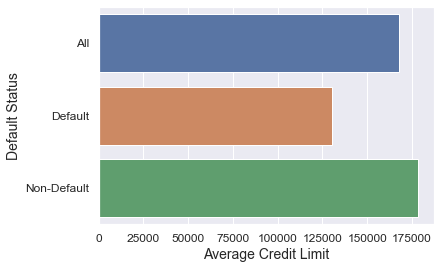

In [4]:
card_default.average_credit_limit()

<a id='section2_2'></a>

## Age

Age does not seem to factor into likelihood of default.

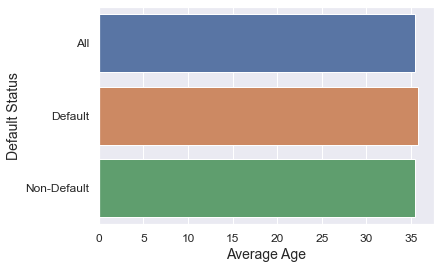

In [5]:
card_default.average_age()

<a id='section2_3'></a>

## Billing Amounts

There does appear to be a difference in the slopes of billing amounts in cardholders inclined to default relative to cardholders that are not inclined to default. It would appear that cardholders inclined to default do attempt to act responsibly by limiting their purchases. 

Billing amounts also appear to be more consistent in cardholders that are more inclined to default. This may be due to cardholders not inclined to default being more able to pay down balances.

Billing amounts in cardholders that are more inclined to default appear to be higher as a percentage relative to their credit limits.

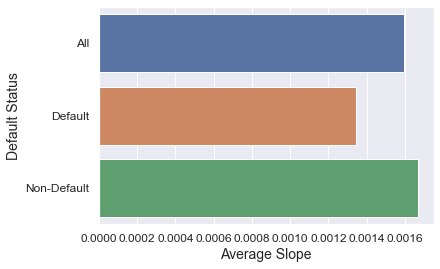

In [6]:
card_default.bill_amount_slope_normalized()

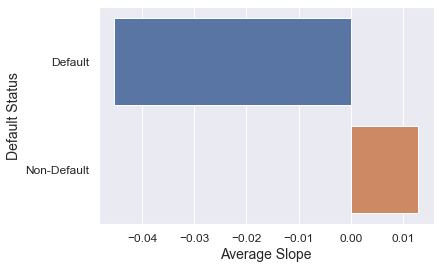

In [7]:
card_default.bill_amount_slope_standardized()

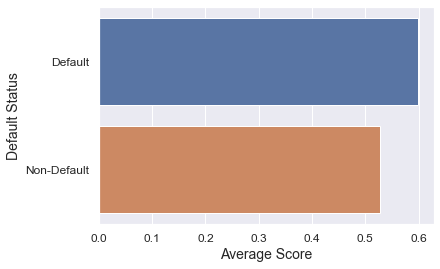

In [8]:
card_default.bill_amount_score()

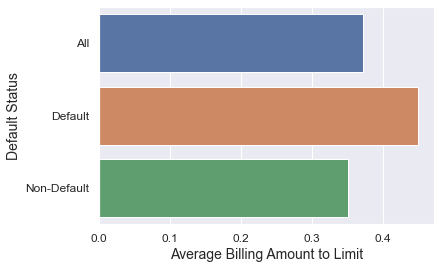

In [9]:
card_default.billing_amount_limit()

<a id='section2_4'></a>

## Payment Amounts

As cardholders not inclined to default have greater slopes to their billing amounts, they also have greater slopes to their payments. This would imply that the nature of purchases and payments are different between cardholders inclined to default versus cardholders that are not. Cardholders inclined to default are curtailing their purchases, but are also making minimal payments, as opposed to cardholders that are not inclined to default drawing down their monthly balances.

Cardholders not inclined to default tend to make purchases as a higher percentage relative to their credit limits.

Payment status is defined as follows;

-2 - Bill amount for the billing period less than or equal to zero. Payment amount for the billing period less than or equal to zero. Amount outstanding for the billing period after payment less than or equal to zero. 

-1 - Bill amount for the billing period greater than zero. Payment amount for the billing period greater than zero. Amount outstanding for the billing period after payment less than or equal to zero.

0 - Bill amount for the billing period greater than zero. Payment amount for the billing period greater than zero. Amount outstanding for the billing period after payment greater than zero.

Values greater than zero represent new purchase activity with no payment made.

This would imply that the average of the sum of payment statuses across billing periods would be better for lower values and worse for higher values. This can be seen when comparing cardholders more inclined to default relative to cardholders that are less inclined to default. 

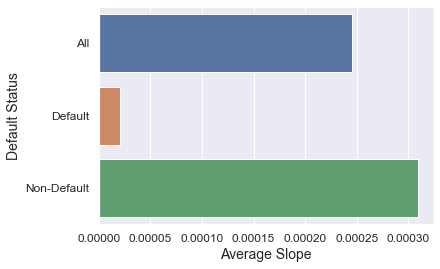

In [10]:
card_default.pay_amount_slope_normalized()

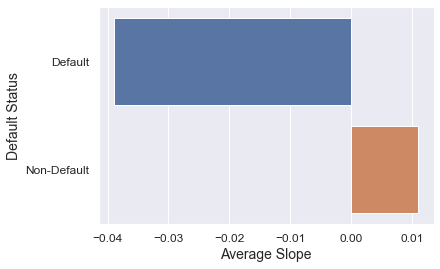

In [11]:
card_default.pay_amount_slope_standardized()

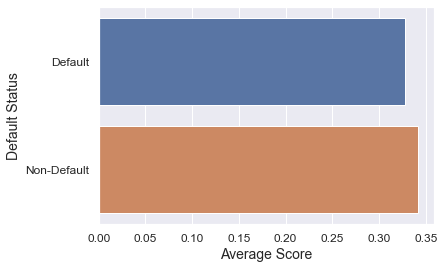

In [12]:
card_default.pay_amount_score()

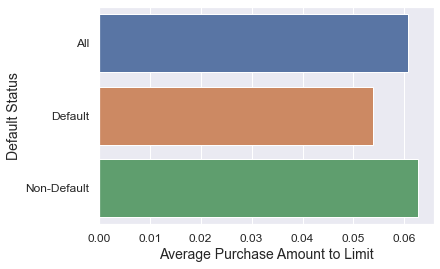

In [13]:
card_default.purchase_amount_limit()

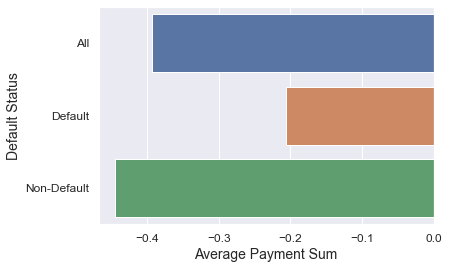

In [14]:
card_default.average_payment()

<a id='section2_5'></a>

## Gender

Males seem to be somewhat more inclined to default than females.

In [15]:
card_default.gender_summary_df

,Gender,All,Default,%,Non-Default,%
0,Male,11888,2873,24.167227,9015,75.832773
1,Female,18112,3763,20.776281,14349,79.223719


<a id='section2_6'></a>

## Education

Education seems to play a role in terms of the likelihood of default. The likelihood of default decreases as education level increases. This does make intuitive sense, since more highly educated individuals tend to have higher incomes. With this in mind, the 'Other' category is probably largely comprised of individuals at the doctoral level.

In [16]:
card_default.education_summary_df

,Education,All,Default,%,Non-Default,%
0,Graduate School,10585,2036,19.234766,8549,80.765234
1,Undergraduate School,14030,3330,23.734854,10700,76.265146
2,High School,4917,1237,25.157616,3680,74.842384
3,Other,454,33,7.268722,421,92.731278


<a id='section2_7'></a>

## Relationship Status

Being married does seem to increase the likelihood of default. Probably due to personal sacrifices being easier to make than familial sacrifices. The 'Other' category closely matches the 'Married' category and is probably comprised largely of common law relationships that would be subject to similar conditions.

In [17]:
card_default.relationship_summary_df

,Relationship,All,Default,%,Non-Default,%
0,Married,13659,3206,23.471704,10453,76.528296
1,Single,15964,3341,20.928339,12623,79.071661
2,Other,377,89,23.607427,288,76.392573


<a id='section2_8'></a>

## Billing Periods

There appears to be a fairly sharp upward tend across billing periods. With payment statuses also somewhat degrading. However, the time frame isn't large enough to indentify this as a long-term trend.

In [18]:
card_default.billing_periods_df

,Month,Bill Amount,Payment Amount,After Payment Balance,Payment Status,New Purchases
0,SEP,49179.075167,5663.580500,43515.494667,-0.320100,7707.836233
1,AUG,47013.154800,5921.163500,41091.991300,-0.357233,8087.083867
2,JUL,43262.948967,5225.681500,38037.267467,-0.389167,8975.887333
3,JUN,40311.400967,4826.076867,35485.324100,-0.422800,7777.624867
4,MAY,38871.760400,4799.387633,34072.372767,-0.472933,6239.028200


<a id='section3'></a>

# Feature Selection

In [19]:
features = card_default.prediction_df.loc[:, 
    ['AFTER_PAYMENT1',
     'AFTER_PAYMENT2',
     'AFTER_PAYMENT3',
     'AFTER_PAYMENT4',
     'AFTER_PAYMENT5',
     'AGE',
     'BILL_AMT1',
     'BILL_AMT2',
     'BILL_AMT3',
     'BILL_AMT4',
     'BILL_AMT5',
     'BILL_AMT6',
     'BILL_AMT1_LIMIT',
     'BILL_AMT2_LIMIT',
     'BILL_AMT3_LIMIT',
     'BILL_AMT4_LIMIT',
     'BILL_AMT5_LIMIT',
     'BILL_AMT6_LIMIT',
     'BILL_AMT_SCORE',
     'BILL_AMT_SLOPE',
     'EDUCATION',
     'LIMIT_BAL',
     'MARRIAGE',
     'NEW_PURCHASE1',
     'NEW_PURCHASE2',
     'NEW_PURCHASE3',
     'NEW_PURCHASE4',
     'NEW_PURCHASE5',
     'NEW_PURCHASE1_LIMIT',
     'NEW_PURCHASE2_LIMIT',
     'NEW_PURCHASE3_LIMIT',
     'NEW_PURCHASE4_LIMIT',
     'NEW_PURCHASE5_LIMIT',
     'PAY_0',
     'PAY_2',
     'PAY_3',
     'PAY_4',
     'PAY_5',
     'PAY_6',
     'PAY_AMT1',
     'PAY_AMT2',
     'PAY_AMT3',
     'PAY_AMT4',
     'PAY_AMT5',
     'PAY_AMT6',
     'PAY_AMT_SCORE',
     'PAY_AMT_SLOPE',
     'PAY_SUM',
     'SEX']]

target = card_default.prediction_df['CARD_DEFAULT']

In [20]:
model = RandomForestClassifier()
column_transformer = make_column_transformer(
    (OneHotEncoder(), 
     ['EDUCATION', 
      'MARRIAGE',
      'SEX']),
    (StandardScaler(), 
     ['AGE',
      'AFTER_PAYMENT1',
      'AFTER_PAYMENT2',
      'AFTER_PAYMENT3',
      'AFTER_PAYMENT4',
      'AFTER_PAYMENT5',
      'BILL_AMT1',
      'BILL_AMT2',
      'BILL_AMT3',
      'BILL_AMT4',
      'BILL_AMT5',
      'BILL_AMT6',
      'BILL_AMT1_LIMIT',
      'BILL_AMT2_LIMIT',
      'BILL_AMT3_LIMIT',
      'BILL_AMT4_LIMIT',
      'BILL_AMT5_LIMIT',
      'BILL_AMT6_LIMIT',
      'BILL_AMT_SLOPE',
      'LIMIT_BAL',
      'NEW_PURCHASE1',
      'NEW_PURCHASE2',
      'NEW_PURCHASE3',
      'NEW_PURCHASE4',
      'NEW_PURCHASE5',
      'NEW_PURCHASE1_LIMIT',
      'NEW_PURCHASE2_LIMIT',
      'NEW_PURCHASE3_LIMIT',
      'NEW_PURCHASE4_LIMIT',
      'NEW_PURCHASE5_LIMIT',
      'PAY_0',
      'PAY_2',
      'PAY_3',
      'PAY_4',
      'PAY_5',
      'PAY_6',
      'PAY_AMT1',
      'PAY_AMT2',
      'PAY_AMT3',
      'PAY_AMT4',
      'PAY_AMT5',
      'PAY_AMT6',
      'PAY_AMT_SLOPE',
      'PAY_SUM']),
    remainder = 'passthrough')
pipeline = make_pipeline(column_transformer, model)

In [21]:
cross_val_score(pipeline, features, target, cv = 5, scoring = 'accuracy', n_jobs = -1).mean()

0.8147333333333334

In [22]:
cross_val_score(pipeline, features, target, cv = 5, scoring = 'roc_auc', n_jobs = -1).mean()

0.7658156716252842

In [23]:
features = card_default.prediction_df.loc[:, 
    [
     'NEW_PURCHASE1_LIMIT',
     'NEW_PURCHASE2_LIMIT',
     'NEW_PURCHASE3_LIMIT',
     'NEW_PURCHASE4_LIMIT',
     'NEW_PURCHASE5_LIMIT',
     'PAY_0',
     'PAY_2',
     'PAY_3',
     'PAY_4',
     'PAY_5',
     'PAY_6',
     'PAY_AMT1',
     'PAY_AMT2',
     'PAY_AMT3',
     'PAY_AMT4',
     'PAY_AMT5',
     'PAY_AMT6',
     'PAY_SUM'
    ]]

scaler = StandardScaler()

scaler.fit(features)
features_scaled = scaler.transform(features)

target = card_default.prediction_df['CARD_DEFAULT']

<a id='section4'></a>

# Hyperparameter Optimization

In [24]:
grid_search = GridSearchCV(RandomForestClassifier(), 
                           dict(n_estimators = [4, 5, 10, 20, 50],
                                criterion = ['gini', 'entropy'], 
                                max_features = ['auto', 'sqrt', 'log2'],
                                bootstrap = [True, False]),                                
                           cv = 5, 
                           scoring = 'accuracy',
                           n_jobs = -1)

grid_search.fit(features_scaled, target)

print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

0.8152333333333333
{'bootstrap': True, 'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 50}
RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       n_estimators=50)


In [25]:
grid_search = GridSearchCV(KNeighborsClassifier(), 
                           dict(n_neighbors = [3, 5, 10, 20],
                                algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute'], 
                                weights = ['uniform', 'distance'],
                                p = [1, 2]),                                
                           cv = 5, 
                           scoring = 'accuracy',
                           n_jobs = -1)

grid_search.fit(features_scaled, target)

print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

0.8150000000000001
{'algorithm': 'auto', 'n_neighbors': 20, 'p': 2, 'weights': 'uniform'}
KNeighborsClassifier(n_neighbors=20)


<a id='section5'></a>

# Pipelines

In [26]:
model_rf = RandomForestClassifier(n_estimators=50)
column_transformer = make_column_transformer(
    (StandardScaler(), 
     [
      'NEW_PURCHASE1_LIMIT',
      'NEW_PURCHASE2_LIMIT',
      'NEW_PURCHASE3_LIMIT',
      'NEW_PURCHASE4_LIMIT',
      'NEW_PURCHASE5_LIMIT',
      'PAY_0',
      'PAY_2',
      'PAY_3',
      'PAY_4',
      'PAY_5',
      'PAY_6',
      'PAY_AMT1',
      'PAY_AMT2',
      'PAY_AMT3',
      'PAY_AMT4',
      'PAY_AMT5',
      'PAY_AMT6',
      'PAY_SUM'
     ]),
    remainder = 'passthrough')
pipeline_rf = make_pipeline(column_transformer, model_rf)

In [27]:
cross_val_score(pipeline_rf, features, target, cv = 5, scoring = 'accuracy', n_jobs = -1).mean()

0.8150000000000001

In [28]:
cross_val_score(pipeline_rf, features, target, cv = 5, scoring = 'roc_auc', n_jobs = -1).mean()

0.7502573531591825

In [29]:
model_knn = KNeighborsClassifier(n_neighbors=20, p=1)
column_transformer = make_column_transformer(
    (StandardScaler(), 
     [
      'NEW_PURCHASE1_LIMIT',
      'NEW_PURCHASE2_LIMIT',
      'NEW_PURCHASE3_LIMIT',
      'NEW_PURCHASE4_LIMIT',
      'NEW_PURCHASE5_LIMIT',
      'PAY_0',   
      'PAY_2',
      'PAY_3',
      'PAY_4',
      'PAY_5',
      'PAY_6',
      'PAY_AMT1',
      'PAY_AMT2',
      'PAY_AMT3',
      'PAY_AMT4',
      'PAY_AMT5',
      'PAY_AMT6',
      'PAY_SUM'
     ]),
    remainder = 'passthrough')
pipeline_knn = make_pipeline(column_transformer, model_knn)

In [30]:
cross_val_score(pipeline_knn, features, target, cv = 5, scoring = 'accuracy', n_jobs = -1).mean()

0.8129

In [31]:
cross_val_score(pipeline_knn, features, target, cv = 5, scoring = 'roc_auc', n_jobs = -1).mean()

0.7417444711581582

<a id='section6'></a>

# Algorithm Comparisons

In [32]:
model_svc = SVC(probability=True)
column_transformer = make_column_transformer(
    (StandardScaler(), 
     [
      'NEW_PURCHASE1_LIMIT',
      'NEW_PURCHASE2_LIMIT',
      'NEW_PURCHASE3_LIMIT',
      'NEW_PURCHASE4_LIMIT',
      'NEW_PURCHASE5_LIMIT',
      'PAY_0',
      'PAY_2',
      'PAY_3',
      'PAY_4',
      'PAY_5',
      'PAY_6',
      'PAY_AMT1',
      'PAY_AMT2',
      'PAY_AMT3',
      'PAY_AMT4',
      'PAY_AMT5',
      'PAY_AMT6',
      'PAY_SUM'
     ]),
    remainder = 'passthrough')
pipeline_svc = make_pipeline(column_transformer, model_svc)

In [33]:
cross_val_score(pipeline_svc, features, target, cv = 10, scoring = 'accuracy', n_jobs = -1).mean()

0.8169666666666666

In [34]:
cross_val_score(pipeline_svc, features, target, cv = 10, scoring = 'roc_auc', n_jobs = -1).mean()

0.7094561321974778

In [35]:
model_gb = GradientBoostingClassifier(loss='exponential')
column_transformer = make_column_transformer(
    (StandardScaler(), 
     [
      'NEW_PURCHASE1_LIMIT',
      'NEW_PURCHASE2_LIMIT',
      'NEW_PURCHASE3_LIMIT',
      'NEW_PURCHASE4_LIMIT',
      'NEW_PURCHASE5_LIMIT',
      'PAY_0',
      'PAY_2',
      'PAY_3',
      'PAY_4',
      'PAY_5',
      'PAY_6',
      'PAY_AMT1',
      'PAY_AMT2',
      'PAY_AMT3',
      'PAY_AMT4',
      'PAY_AMT5',
      'PAY_AMT6',
      'PAY_SUM'
     ]),
    remainder = 'passthrough')
pipeline_gb = make_pipeline(column_transformer, model_gb)

In [36]:
cross_val_score(pipeline_gb, features, target, cv = 10, scoring = 'accuracy', n_jobs = -1).mean()

0.8210333333333333

In [37]:
cross_val_score(pipeline_gb, features, target, cv = 10, scoring = 'roc_auc', n_jobs = -1).mean()

0.7726602432717952

In [38]:
model_mlp = MLPClassifier(activation='logistic', learning_rate='invscaling')
column_transformer = make_column_transformer(
    (StandardScaler(), 
     [
      'NEW_PURCHASE1_LIMIT',
      'NEW_PURCHASE2_LIMIT',
      'NEW_PURCHASE3_LIMIT',
      'NEW_PURCHASE4_LIMIT',
      'NEW_PURCHASE5_LIMIT',
      'PAY_0',   
      'PAY_2',
      'PAY_3',
      'PAY_4',
      'PAY_5',
      'PAY_6',
      'PAY_AMT1',
      'PAY_AMT2',
      'PAY_AMT3',
      'PAY_AMT4',
      'PAY_AMT5',
      'PAY_AMT6',
      'PAY_SUM'
     ]),
    remainder = 'passthrough')
pipeline_mlp = make_pipeline(column_transformer, model_mlp)

In [39]:
cross_val_score(pipeline_mlp, features, target, cv = 10, scoring = 'accuracy', n_jobs = -1).mean()

0.819

In [40]:
cross_val_score(pipeline_mlp, features, target, cv = 10, scoring = 'roc_auc', n_jobs = -1).mean()

0.7639805715484091

<a id='section7'></a>

# Conclusions

Credit limits appear to be lower for cardholders that are more inclined to default. This makes intuitive sense since cardholders with higher credit limits will have higher; income, assets, and credit scores. 

Age does not seem to factor into likelihood of default.

There does appear to be a difference in the slopes of billing amounts in cardholders inclined to default relative to cardholders that are not inclined to default. It would appear that cardholders inclined to default do attempt to act responsibly by limiting their purchases.

Billing amounts also appear to be more consistent in cardholders that are more inclined to default. This may be due to cardholders not inclined to default being more able to pay down balances.

Billing amounts in cardholders that are more inclined to default appear to be higher as a percentage relative to their credit limits. 

As cardholders not inclined to default have greater slopes to their billing amounts, they also have greater slopes to their payments. This would imply that the nature of purchases and payments are different between cardholders inclined to default versus cardholders that are not. Cardholders inclined to default are curtailing their purchases, but are also making minimal payments, as opposed to cardholders that are not inclined to default drawing down their monthly balances.

Cardholders not inclined to default tend to make purchases as a higher percentage relative to their credit limits.

Payment status is defined as follows;

-2 - Bill amount for the billing period less than or equal to zero. Payment amount for the billing period less than or equal to zero. Amount outstanding for the billing period after payment less than or equal to zero.

-1 - Bill amount for the billing period greater than zero. Payment amount for the billing period greater than zero. Amount outstanding for the billing period after payment less than or equal to zero.

0 - Bill amount for the billing period greater than zero. Payment amount for the billing period greater than zero. Amount outstanding for the billing period after payment greater than zero.

Values greater than zero represent new purchase activity with no payment made.

This would imply that the average of the sum of payment statuses across billing periods would be better for lower values and worse for higher values. This can be seen when comparing cardholders more inclined to default relative to cardholders that are less inclined to default.

Males seem to be somewhat more inclined to default than females.

Education seems to play a role in terms of the likelihood of default. The likelihood of default decreases as education level increases. This does make intuitive sense, since more highly educated individuals tend to have higher incomes. With this in mind, the 'Other' category is probably largely comprised of individuals at the doctoral level.

Being married does seem to increase the likelihood of default. Probably due to personal sacrifices being easier to make than familial sacrifices. The 'Other' category closely matches the 'Married' category and is probably comprised largely of common law relationships that would be subject to similar conditions.

There appears to be a fairly sharp upward tend across billing periods. With payment statuses also somewhat degrading. However, the time frame isn't large enough to indentify this as a long-term trend.

Predictability of credit card default appears to be quite high at around 82% across algorithms. The Gradient Boosting Classifier performed the best when factoring in ROC/AUC.